# Исследование рынка компьютерных игр

**Цель проекта**
Выявить закономерности, определяющие успешность на рынке той или иной игры, для дальнейшего выделения потенциально популярного продукта и планирования рекламных кампаний.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Примечание
Данные за 2016 год могут быть неполными.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

## Описание данных

In [2]:
data = pd.read_csv('D:/учеба/портфолио/roots/1 sborn_games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные представлены таблицей с 16715 строками и 11 столбцами.
- Названия колонок содержат буквы в разных регистрах, нужно привести к одному.
- Столбцы с названиями (игры, платформы и жанра) представлены текстовым типом данных, строки содержат строчные и заглавные буквы (могут быть неявные дубликаты). Столбец с годом релиза игры представлен в формате вещественного числа - поменяем тип данных. Столбцы с оценками критиков и пользователей содержат числовой тип данных, но в User_Score данные в формате текстовом, нужно привести к нужному. Рейтинг обозначен буквенно, столбец данных с текстовым типом.

Посмотрим на описание столбцов с числовыми данными:

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


- минимальные продажи везде 0 миллионов копий
- первый квартиль везде в продажах 0 миллионов копий, медиана меньше среднего - данные очень сильно скошены вправо
- год релиза, представленный в таком формате, показал нам, что в данных есть информация с 1980 по 2016 г.
- оценка критиков минимум 13, максимум 98, среднняя 71 (достаточно высокая), std=13.93, разброс данных небольшой, оценка критиков редко выходила ниже 54 баллов.

Посмотрим на пропуски и явные дубли:

In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
data['Year_of_Release'].isna().sum()/len(data), data['Critic_Score'].isna().sum()/len(data), 6701/len(data), 6766/len(data)

(0.01609332934489979,
 0.5131917439425665,
 0.4008973975471134,
 0.4047861202512713)

Пропуски есть:
- в столбцах name, genre - всего по 2 пропуска
- год релиза/year_of_release, доля пропусков 0,01
- больше всего пропусков в данных с оценками игр и их рейтингом: 'Critic_Score' - доля пропусков 0,51, User_Score и Rating- доля пропусков 0,40

In [8]:
data.duplicated().sum()

0

Явных дубликатов нет.

**Далее нужно будет обработать названия столбцов,некоторые из них привести к нужному для анализа типу, обработать пропуски, удалить данные с пропусками в столбце 'name' - 2 пропуска и в столбце с гором релиза - доля пропусков 0,16 (больше никакие данные удалять не будем, данное количество удалений не повлияет на наш дальнейший анализ**

## Внесение правок в данные и обработка пропусков

Удаляем пропуски в выбранных столбцах.

In [9]:
data = data.dropna(subset=['Year_of_Release', 'Name']).reset_index(drop=True)

**Обрабатываем название столбцов.**

Меняем регистр и добавляем единицу измерения в продажи mln_copy

In [10]:
#смотрим названия
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [11]:
data.columns = data.columns.str.lower()

In [12]:
#правим и проверяем
data = data.rename(
    columns={'na_sales':'na_sales_mln_copy', 'eu_sales':'eu_sales_mln_copy',
           'jp_sales':'jp_sales_mln_copy', 'other_sales':'other_sales_mln_copy'}
)

In [13]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales_mln_copy',
       'eu_sales_mln_copy', 'jp_sales_mln_copy', 'other_sales_mln_copy',
       'critic_score', 'user_score', 'rating'],
      dtype='object')

**Обрабатываем столбцы 'name', 'platform', 'genre'**

Приведем все строковые значения к нижнему регистру, оценим количество значений до и после изменений (проверка на наличие неявных дубликатов).

In [14]:
correct_list = ['name', 'platform', 'genre']
for column in correct_list:
    print(len(data[column].unique()))
    data[column] = data[column].str.lower()
    print(len(data[column].unique()))

11426
11426
31
31
12
12


От смены регистра, количество значений не поменялось (не было неявных дубликатов по регистру).

Посмотрим столбцы 'platform', 'genre', количество значений небольшое, можно зрительно оценить есть ли неявные дубликаты из-за написания.

In [15]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [16]:
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Неявных дублей нет, примем что данные изначально качественные и в столбце 'name' - все названия также без неявных дублей.

**Год релиза**

Для удобства в дальнейшем анализе приводим к типу 'int'

In [17]:
data['year_of_release'] = data['year_of_release'].astype('int')

**Оценка критиков**

In [18]:
# смотрим уникальные значения
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [19]:
# для пропусков применяем "заглушку", эти значение далее будем фильтровать
data['critic_score'] = data['critic_score'].fillna(1111)

In [20]:
# приводим к нужному типу данных
data['critic_score'] = data['critic_score'].astype('int')

**Оценка пользователей**

In [21]:
# смотрим уникальные значения
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Здесь два типа пропущенных значений nan и tbd(те данные, которые должны были быть добавлены, но их пока нет). Применим разные "заглушки"

In [22]:
data['user_score'] = data['user_score'].fillna(1111)

In [23]:
data['user_score'] = data['user_score'].replace('tbd', 2222)

Заново оценим долю пропусков (до этого не учитывались "tbd")

In [24]:
(len(data[data['user_score'] == 2222]) / len(data)) + (len(data[data['user_score'] == 1111]) / len(data))

0.5461566528825104

Доля пропусков с учетом "tbd" увеличилась довольно сильно с 0,40 до 0,54.

In [25]:
data['user_score'] = data['user_score'].astype('float')

**Рейтинги**

In [26]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Абсолютное большинство игр, из тех в которых указан  рейтинг, указаны как: Е,Т, М и Е10+

In [27]:
#заменяем пропуски на "unknown"
data['rating'] = data['rating'].fillna('unknown')

В столбце Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Посмотрим как описаны, представленные у нас рейтинги:
- E - для всех возрастов,
- T - подростки, 13+
- M - 17+
- Е10+ - для всех, от 10 лет
- EC - для детей 3+ и старше
- K-A - устаревший рейтинг, был заменен на E (**также заменим его на Е**)
- АО - только для взрослых 18+
- RP - рейтинг ожидается, **включим его в unknown**

*Источник* 
https://dic.academic.ru/dic.nsf/ruwiki/140779#.D0.94.D0.B5.D0.B9.D1.81.D1.82.D0.B2.D1.83.D1.8E.D1.89.D0.B8.D0.B5

In [28]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].replace('RP', 'unknown')

### Итоги

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  16444 non-null  object 
 1   platform              16444 non-null  object 
 2   year_of_release       16444 non-null  int32  
 3   genre                 16444 non-null  object 
 4   na_sales_mln_copy     16444 non-null  float64
 5   eu_sales_mln_copy     16444 non-null  float64
 6   jp_sales_mln_copy     16444 non-null  float64
 7   other_sales_mln_copy  16444 non-null  float64
 8   critic_score          16444 non-null  int32  
 9   user_score            16444 non-null  float64
 10  rating                16444 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.3+ MB


**Итак мы удалили пропуски в столбцах  name и year_of_release (доля удаленных пропусков 0,16).**

**Остальные пропуски заполнили заглушками:**
- для critic_score - заглушка 1111
- для user_score - для nan - заглушка 1111, для 'tbd' - заглушка 2222

**Привели данные к нужным типам.**

## Расчеты

Посчитаем суммарные продажи, создадим отдельный столбец с этими суммами

In [30]:
data['total_sales_mln_copy'] = data['na_sales_mln_copy'] + data['eu_sales_mln_copy'] + data['jp_sales_mln_copy'] + data['other_sales_mln_copy']

In [31]:
data['total_sales_mln_copy'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales_mln_copy, dtype: float64

Минимальные продажи также 0 млн.копий игры, максимальные 82,54 млн. копий игры, медиана меньше среднего, данные скошены вправо.

In [32]:
#посмотрим на игры, которые продались как 0 млн. копий
data[data['total_sales_mln_copy'] == 0]

,name,platform,year_of_release,genre,na_sales_mln_copy,eu_sales_mln_copy,jp_sales_mln_copy,other_sales_mln_copy,critic_score,user_score,rating,total_sales_mln_copy
16405,g1 jockey 4 2008,ps3,2008,sports,0.0,0.0,0.0,0.0,1111,1111.0,unknown,0.0
16438,score international baja 1000: the official game,ps2,2008,racing,0.0,0.0,0.0,0.0,1111,1111.0,unknown,0.0


Кроме платформы, года выпуска и жанра, больше никакой информации на обе эти игры нет. Удалим их и нашего анализа.

In [33]:
#удалим
data = data.drop(index=[16405])
data = data.drop(index=[16438])

In [34]:
data['total_sales_mln_copy'].min()

0.01

## Исследовательский анализ данных

### По общим данным

Посмотрим динамику выпуска игр по годам

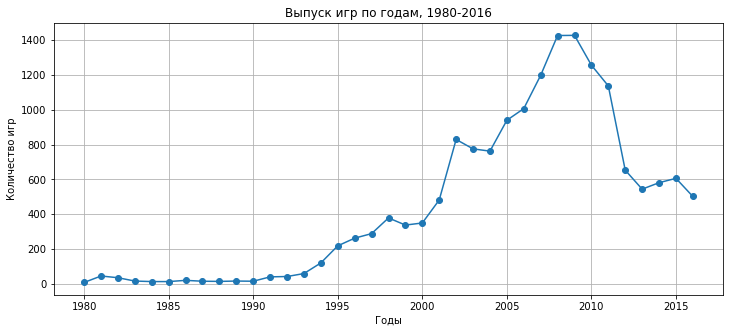

In [65]:
data.groupby('year_of_release')['name'].count().plot(
    x='year_of_release', y='name', style='o-', title = 'Выпуск игр по годам, 1980-2016', grid=True, figsize=(12,5),
    xlabel='Годы', ylabel='Количество игр'
)
plt.show()

Достаточно ровное количество выпускающихся игр на протяжении примерно 13 лет, до 1993 года, затем развитие индустрии (большее количество людей смогли себе позволить приобрести игровые платформы, всдед за этим рынок стал развиваться и насыщаться) до 2008 года, а затем резкий спад, связанный с ростом популярности игр на мобильных устройствах.

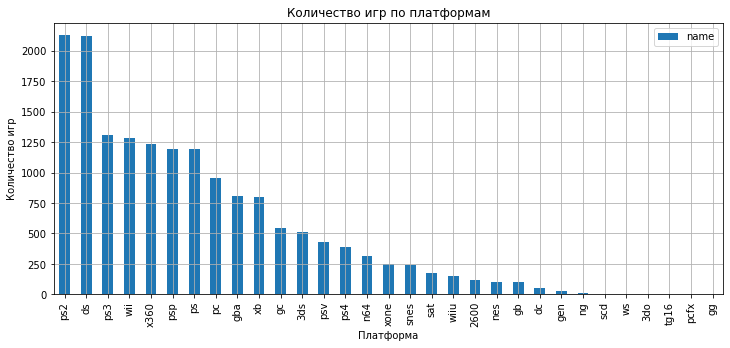

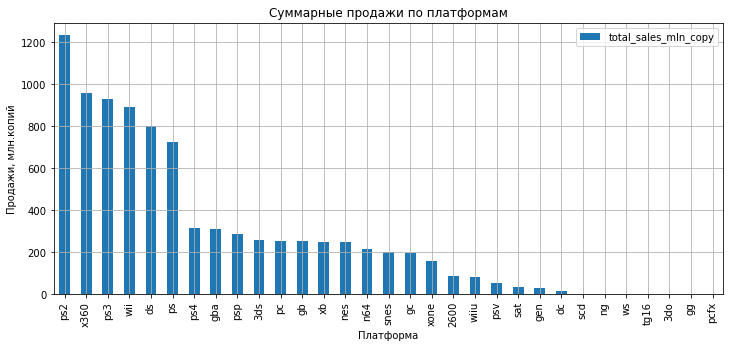

In [36]:
data.pivot_table(index='platform', values='name', aggfunc=('count')).sort_values(
    by='name', ascending=False).plot(
    kind='bar', title = 'Количество игр по платформам', grid=True, 
    figsize=(12,5), xlabel='Платформа', ylabel='Количество игр'
)
platform_sales = data.pivot_table(index='platform', values='total_sales_mln_copy', aggfunc=('sum')).sort_values(
    by='total_sales_mln_copy', ascending=False)
platform_sales.plot(
    kind='bar', title = 'Суммарные продажи по платформам', grid=True, 
    figsize=(12,5), xlabel='Платформа', ylabel='Продажи, млн.копий'
)
plt.show()

По количеству, выпущенных за все время игр:
- абсолютное лидерство у ps2 и ds
- во второй группе: ps3, wii, x360, psp, ps

По проданным за все время копиям игр (единица изменения - млн.копий в наших данных):
- лидирует ps2
- во второй группе x360, ps3, wii, ds, ps.

В целом лидирующая группа одна и таже. Далее посмотрим на распределение продаж по годам на лидирующих платформах по суммарным продажам:

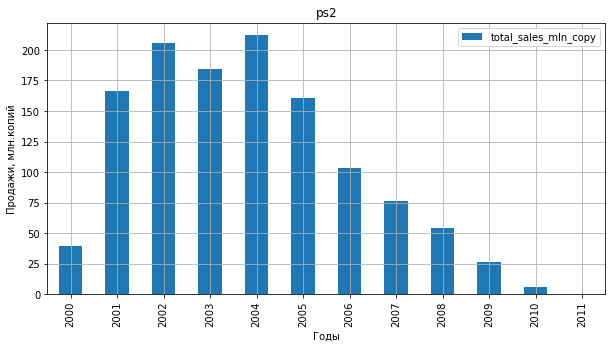

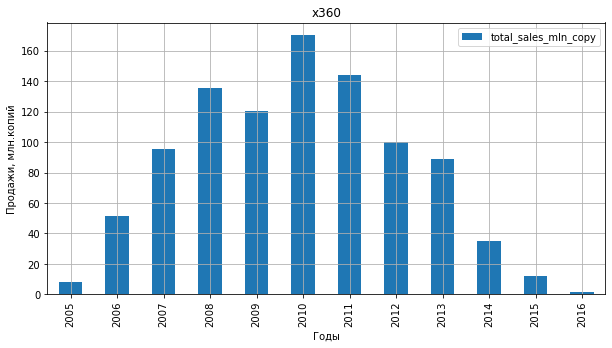

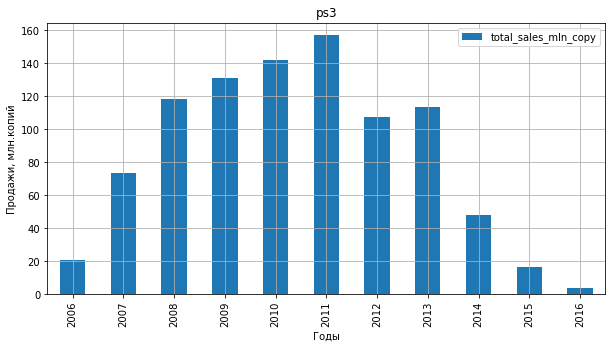

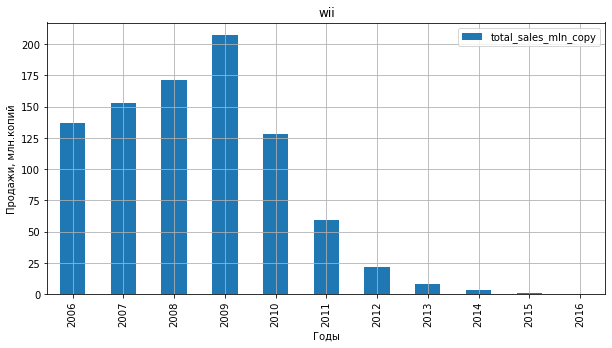

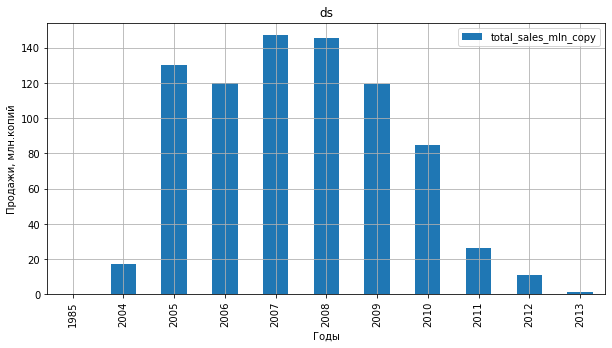

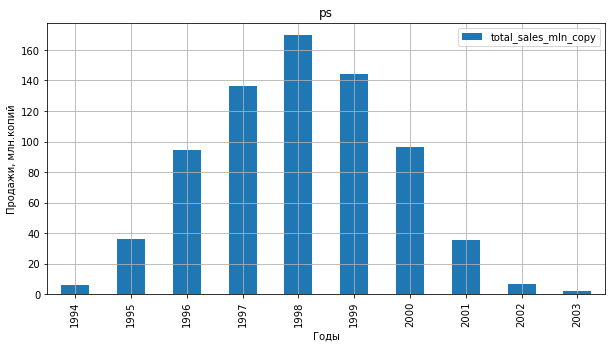

In [72]:
# задаем цикл

for platform in platform_sales.index[:6]:
    (data.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales_mln_copy', aggfunc='sum')
     .plot(kind='bar', grid=True, figsize=(10,5), title=platform, xlabel='Годы', ylabel='Продажи, млн.копий')
    )

plt.show()

У всех рассмотренных платформ мы видим первоначальный рост продаж (часто очень резкий), затем постепенный спад. Сначала люди скупают "новинки", далее с течением времени происходит очередной технологический скачок, придумываются новые форматы, новые игры, платформы создают с учетом современных возможностей (технических/креативных)  - и пользователи вновь уходят к интересному "новичку".

В этом контексте понятно, что для дальнейшего анализа нам стоит посмотреть на время жизни платформ, а затем выбрать наиболее перспективные из них и ограничить наши данные временным интервалом, который позволит дать актуальный прогноз.

In [38]:
#исследуем время жизни платформ
time_platform = data.groupby('platform')['year_of_release'].agg({'max', 'min'})
time_platform['time'] = time_platform['max'] - time_platform['min']

In [39]:
time_platform['time'].describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: time, dtype: float64

Итак, среднее время жизни платформы = 7 лет, медианное значение 6 лет. Есть платформы-"долгожители" - там геймеры преданные, те, которые привыкли пользоваться только этой платформой. Максимальный срок жизни платформы в наших данных - 31 год - это pc/персональный компьютер.

In [40]:
# посмотрим платформы, не выпустившие релизы в 2015 году (последние полные данные по году)
time_platform.loc[time_platform['max'] < 2015].sort_values(by='time', ascending=False)

,max,min,time
platform,,,
ds,2013,1985,28
gb,2001,1988,13
nes,1994,1983,11
ps2,2011,2000,11
dc,2008,1998,10
ps,2003,1994,9
snes,1999,1990,9
2600,1989,1980,9
xb,2008,2000,8


Среди платформ, переставших к 2015 г. выпускать новые игры есть такие, которые не продержались больше года(gg, pcfx, tg16), и "долгожитель" ds ушедший в 2013, так как в 2011 году начал выпускать игры 3ds.

In [41]:
# посмотрим платформы, которые еще в строю
actual_platform = time_platform.loc[time_platform['max'] >= 2015].sort_values(by='time', ascending=False)
actual_platform

,max,min,time
platform,,,
pc,2016,1985,31
psp,2015,2004,11
x360,2016,2005,11
ps3,2016,2006,10
wii,2016,2006,10
3ds,2016,2011,5
psv,2016,2011,5
wiiu,2016,2012,4
ps4,2016,2013,3


Среди платформ, выпустивших релизы игр в 2015-2016 гг есть:
- платформы-"долгожители", которые выпускают игры для своих преданных фанатов, о них из предыдущего анализа мы знаем, что 1. продажи упали у x360, ps3 и wii 2. pc и psp в целом приносят меньшие продажи, чем более молодые конкуренты.
- платформы-новички (срок жизни на момент анализа 3-5 лет) рассмотрим подробнее ниже

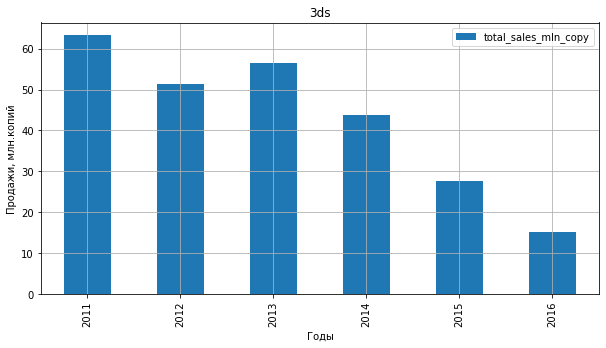

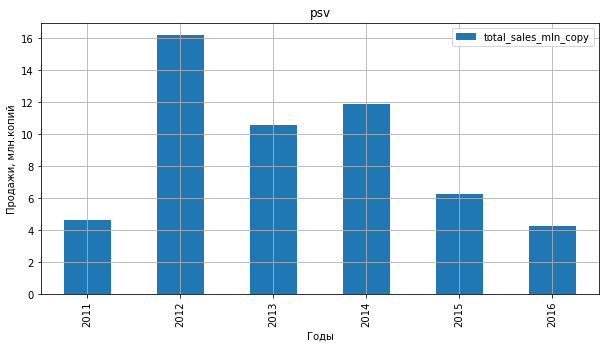

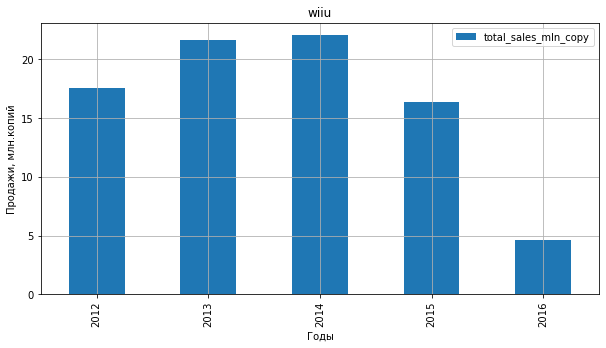

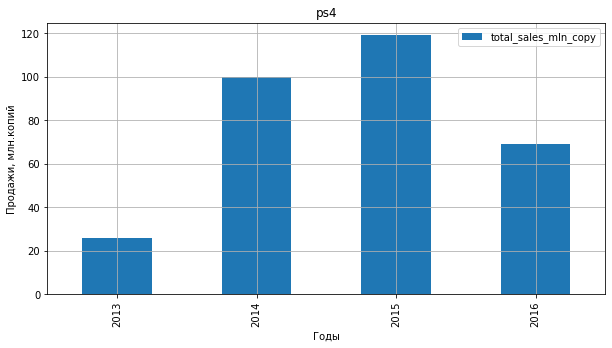

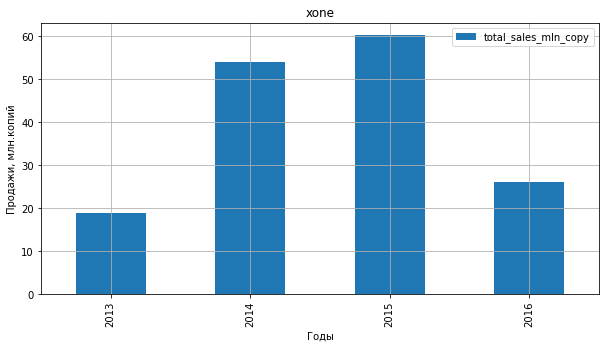

In [42]:
for platform in actual_platform.index[5:]:
    (data.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales_mln_copy', aggfunc='sum')
     .plot(kind='bar', figsize=(10,5), grid=True, title=platform, xlabel='Годы', ylabel='Продажи, млн.копий')
    )
    plt.show()

Опишим каждую платформу (учитывая, что данные за 2016 г. неполные):
- 3ds - первый релиз в 2011 году, сразу высокие показатели, видно тенденцию к медленному спаду: 2013 год - более 60 млн.копий продано, в 2015 году, меньше 30 млн. копий. В 2016 году вероятно будет вновь небольшое падение, на данный момент есть данные о 15 млн.копий
- psv - первый релиз в 2011 году, продажи с 4 млн. копий в 2011 году резко выросли до 16 млн.копий в 2012 году, далее волнообразный спад продаж, в 2015 году продано чуть более 6 млн. копий, в 2016 году уже продано чуть более 4 млн.копий (будет вероятнее всего совсем небольшой спад или ровные показатели с 2015 годом)
- wiiu - первый релиз в 2012 году, рост небольшой с 17 млн. копий продаж в 2012 году, до 23 млн.копий в 2014 году, далее снижение показателей и данные на 2016 год также вероятно покажут значимое снижение, на текущий момент в данных есть продажа менее 5 млн.копий
- ps4 - первый релиз в 2013 году, хороший рост с 20 млн.копий до почти 120 млн. копий в 2015 году. Данные на 2016 год выглядят также вполне оптимистично, с учетом неполной информации уже продано почти 70 млн.копий. 
- xone - первый релиз в 2013 году, рост с почти 20 млн.копий до почти 60 млн. копий в 2015 году. Данные на 2016 год выглядят также вполне оптимистично, с учетом неполной информации уже продано более 25 млн.копий.

#### Выводы

**Из-за того, что игровая индустрия очень динамичная сфера, срок жизни игровых платформ постепенно сокращается. В среднем платформа живет 6-7 лет из них 3-5 лет находится на подъеме и пике продаж, далее идет спад. Поэтому для дальнейшего анализа, нацеленного на прогнозирование будущих продаж, возьмем временной промежуток с 2013 года (то есть полных 3 года, чтобы "поймать" те платформы, которые находятся в периоде роста и пика).**

**Перспективные платформы исходя из возраста и дохода - ps4, xone, 3ds,wiiu - молодые платформы на этапе стабилизации уровня дохода возможно небольшого снижения. Они принесли больший доход в последний учтенный полный год.**



### По актуальному периоду

In [43]:
# создадим df по актуальному периоду, оценим его объем
period_data = data.loc[data['year_of_release'] >= 2013]
period_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2233 non-null   object 
 1   platform              2233 non-null   object 
 2   year_of_release       2233 non-null   int32  
 3   genre                 2233 non-null   object 
 4   na_sales_mln_copy     2233 non-null   float64
 5   eu_sales_mln_copy     2233 non-null   float64
 6   jp_sales_mln_copy     2233 non-null   float64
 7   other_sales_mln_copy  2233 non-null   float64
 8   critic_score          2233 non-null   int32  
 9   user_score            2233 non-null   float64
 10  rating                2233 non-null   object 
 11  total_sales_mln_copy  2233 non-null   float64
dtypes: float64(6), int32(2), object(4)
memory usage: 209.3+ KB


#### Глобальные продажи игр в разбивке по платформам.

In [44]:
period_data_pivot = period_data.pivot_table(
    index=['platform'],
    values = 'total_sales_mln_copy',
    aggfunc=('mean', 'sum')
)
period_data_pivot['life'] = time_platform['time']
period_data_pivot.sort_values(by='mean', ascending=False).style.format('{:.2f}')

,mean,sum,life
platform,,,
ps4,0.80,314.14,3.00
x360,0.74,136.80,11.00
xone,0.65,159.32,3.00
wii,0.59,13.66,10.00
wiiu,0.56,64.63,4.00
ps3,0.53,181.43,10.00
3ds,0.47,143.25,5.00
pc,0.21,39.43,31.00
ds,0.19,1.54,28.00


- По средним продажам за год лидируют: ps4, x360, xone. Хотя последние две платформы по суммарным продажам за актуальный период уступают ps3
- Совсем небольшие средние продажи у psp (старая платформа, на закате жизни) и psv (срок жизни для платформы уже зрелый, учитывая современное состояние индустрии, эту платформу в рекламных акциях учитывать не стоит)

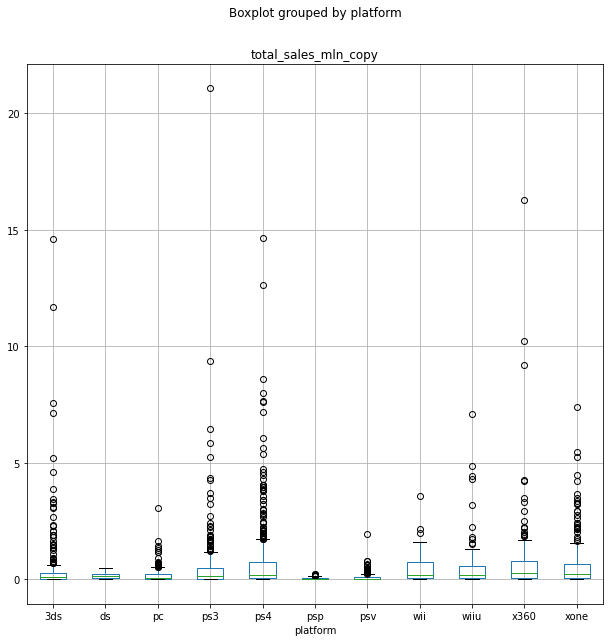

In [83]:
period_data.boxplot('total_sales_mln_copy', by='platform', figsize=(10,10))
plt.show()

##### Выводы

Мы видим множество выбросов, большую скошенность вправо с длинным хвостом значений - крупных, но редких покупок. На лидирующих позициях по межквартильному размаху все те же платформы: ps4, wii, x360, xone - так как распределение сдвинуто вправо, в этих платформах большинство значений находится в достаточно высокой зоне продаж. Стоит также обратить внимание на 3ds и ps3, площадь высоких частотных значений у них ниже, но есть большое количество выбросов, что двигает за собой среднее.
Стабильные данные по продажам можем оценить по медиане - выше медианы продаж у  ps4, wii, x360, xone, wiiu

#### Корреляция между отзывами и продажами

Посмотрим зависят ли продажи от отзывов критиков и пользователей.

In [46]:
# Функция для вывода на экран данных о корреляции, а также диаграмм рассеяния
def corr_s(data, name=''):
    data_corr = data.loc[(data['critic_score'] != 1111) & (data['user_score'] != 1111) & (data['user_score'] != 2222)]
    data_corr_print = data_corr[['total_sales_mln_copy', 'critic_score', 'user_score']].corr()
    print(f'____Корреляция_____{name}')
    print(data_corr_print)
    
    score_critic = data.loc[data['critic_score'] != 1111].plot(
    x='critic_score', y='total_sales_mln_copy', kind='scatter', alpha=0.3, title=f'РАСПРЕДЕЛЕНИЕ:продажи-оценка критиков_{name}',
    )
    score_user = data.loc[(data['user_score'] != 1111) & (data['user_score'] != 2222)].plot(
    x='user_score', y='total_sales_mln_copy', kind='scatter', alpha=0.3, title=f'РАСПРЕДЕЛЕНИЕ:продажи-оценка пользователей_{name}'
    )
    return score_critic, score_user

Первой рассмотрим самую успешную платформу - ps4

____Корреляция_____ps4
                      total_sales_mln_copy  critic_score  user_score
total_sales_mln_copy              1.000000      0.405895   -0.033625
critic_score                      0.405895      1.000000    0.557654
user_score                       -0.033625      0.557654    1.000000


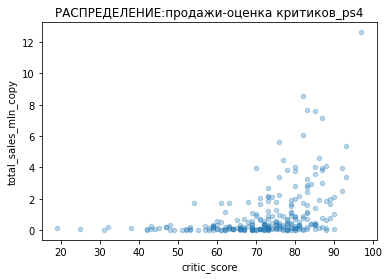

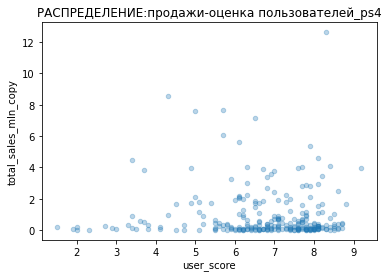

In [84]:
ps4 = period_data.loc[period_data['platform'] == 'ps4']
corr_s(ps4, name='ps4')
plt.show()

Корреляция между отзывами критиков и глобальными продажами 0,4 - положительная, слабая. То есть хорошие отзывы критиков слабо, но все же влияют на увеличение глобальных продаж. А вот хорошие оценки пользователей дают очень слабую отрицательную корреляцию (-0,03) продаж, практически нулевую.

Далее рассмотрим следующие по продажам в 2015 году платформы - xone и 3ds.

____Корреляция_____xone
                      total_sales_mln_copy  critic_score  user_score
total_sales_mln_copy              1.000000      0.410422   -0.094003
critic_score                      0.410422      1.000000    0.472462
user_score                       -0.094003      0.472462    1.000000


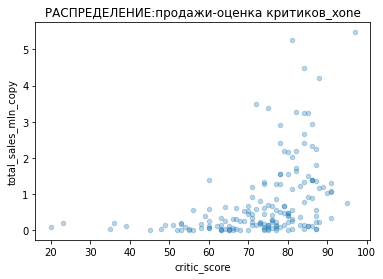

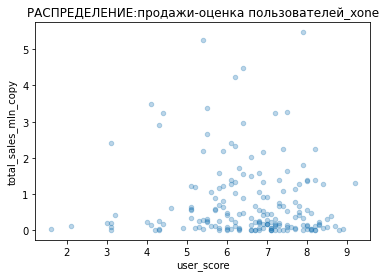

In [85]:
xone = period_data.loc[period_data['platform'] == 'xone']
corr_s(xone, name='xone')
plt.show()

Корреляция отзывов критиков с глобальными продажами так же как с ps4 - слабая положительная (0,4), но эта платформа еще менее зависимая от оценки пользователей, хотя это незаметное влияние (-0,09) так же как с ps4 имеет отрицательный вектор.

____Корреляция_____3ds
                      total_sales_mln_copy  critic_score  user_score
total_sales_mln_copy              1.000000      0.339235    0.272990
critic_score                      0.339235      1.000000    0.769536
user_score                        0.272990      0.769536    1.000000


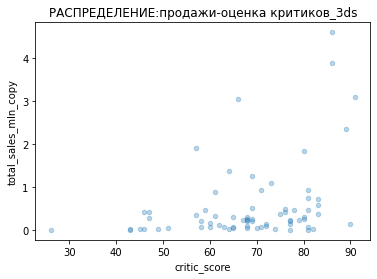

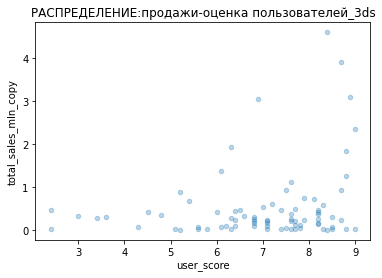

In [86]:
III_ds = period_data.loc[period_data['platform'] == '3ds']
corr_s(III_ds, name='3ds')
plt.show()

В этой платформе ситуация немного другая, продажи слабо но, все же зависят от хороших отзывов критиков (слабая положительная корреляция 0,33) и пользователей (слабая положительная корреляция 0,27).

Кроме того, на всех трех платфрмах отзывы критиков и отзывы пользователей подвержены корреляции даже больше, чем продажи
- на ps4 - средняя положительная зависимость между хорошими отзывами критиков и пользователей (0,55)
- на xone - слабая положительная зависимость между хорошими отзывами критиков и пользователей(0,47)
- на 3ds -  высокая положительная зависимость между хорошими отзывами критиков и пользователей(0.76) 

##### Выводы

На платформах ps4 и xone слабая зависимость между хорошими отзывами критиков и глобальными продажами. Незначительная отрицательная корреляция между отзывами игроков и продажами.
На 3ds слабая положительная корреляция как между отзывами критиков и продажами, так и между отзывами пользователей и продажами.
На всех трех платформах отзывы критиков и отзывы пользователей взаимосвязаны достаточно заметно.

**В целом можно сказать, что немногие пользователи опираются на чьи-либо отзывы при покупке игры. Но влиятие критиков все же более заметно. Так же заметна взаимосвязь между хорошими отзывами критиков и пользователей.**

#### Жанры: распределение и доходность

In [50]:
# посмотрим сколько жанров всего в данных по актуальному периоду
len(period_data['genre'].unique())

12

In [51]:
# распределение игр по жанрам в актуальном периоде
period_data['genre'].value_counts()

action          766
role-playing    292
adventure       245
sports          214
shooter         187
misc            155
racing           85
fighting         80
platform         74
simulation       62
strategy         56
puzzle           17
Name: genre, dtype: int64

Большее количество игр в жанре action/экшен, примерно равные доли у ролевых игр/role-playing, adventure и спортивных игр. На 4 месте - шутеры.

Посмотрим как продавались игры за полный исследуемый период

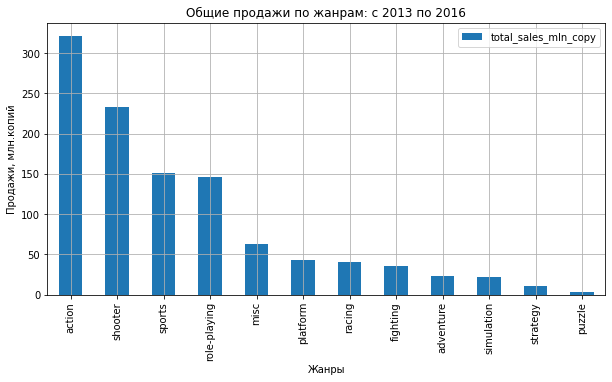

In [87]:
period_data.pivot_table(
    index='genre', values='total_sales_mln_copy', aggfunc='sum'
).sort_values(by='total_sales_mln_copy', ascending=False).plot(
    kind='bar', figsize=(10,5), grid=True, title='Общие продажи по жанрам: c 2013 по 2016',
      xlabel='Жанры', ylabel='Продажи, млн.копий'
     )
plt.show()

Экшен также лидирует по глабальным продажам в актуальном периоде - более 300 млн.копий, на втором месте шутеры - более 230 млн. проданных копий, далее спортивные и ролевые игры с почти 150 млн. копий продаж. Остальные жанры заметно отстают, хуже всего продаются стратегии и пазлы - менее 20 млн.копий.

Далее оценим продажи жанров по каждому исследуемому году в актуальном периоде (помним, что данные за 2016 год неполные)

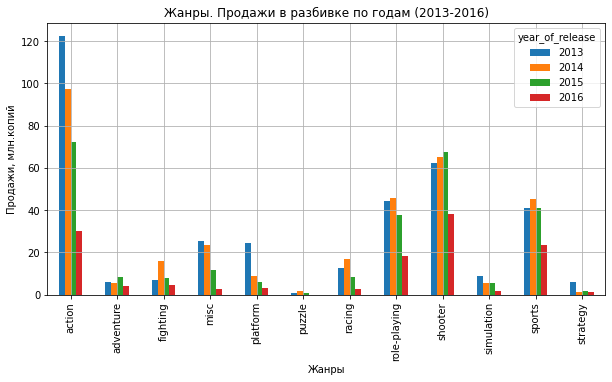

In [88]:
period_data.pivot_table(
    index='genre', columns='year_of_release', values='total_sales_mln_copy', aggfunc='sum'
).plot(kind='bar', figsize=(10,5), grid=True, title='Жанры. Продажи в разбивке по годам (2013-2016)',
      xlabel='Жанры', ylabel='Продажи, млн.копий')
plt.show()

 - для экшена лучший год продаж 2013 (120 млн. проданных копий), далее падение продаж (2015 год - 70 млн.копий)
 - шутеры наоборот идут в небольшой рост каждый год, от 60 млн. копий постепеннно наращивая к 70 млн. копий продаж.
 - ролевые игры наибольшие продажи показали в 2014 году, около 50 млн.копий, далее падение в 2015 до 38 млн. проданных копий
 - спортивные игры, похожая картина с ролевыми играми: наибольшие продажи в 2015 около 45 млн.копий, но падение продаж в 2015 году было меньшим, чем у ролевых игр.
  - в остальных жанрах ситуация похожая, есть пиковый год (2013 или 2014), затем падение продаж. Выделяется только adventure - продажи в жанре небольшие (все годы менее 10 млн. копий), но пиковый для них показатель зафиксирован в 2015 году. Эти игры, как и шутеры показали небольшой рост продаж.
  - в 2016 году (данные неполные) - по уже проданным копиям лидируют шутеры (около 40 млн. копий), эшены (30 млн. копий продано), спорт (более 200 млн.копий) и ролевые игры (около 20 млн. копий).
 
 
 **Несмотря на падение, количество проданных копий у экшен-игр большое, перспективы обвала нет. Шутеры находились в фазе роста продаж и продажи в 2016 году уже выше экшен игр. Ролевые игры и спорт также показывают неплохие продажи, хотя заметно снижение показателей. Среди оставшихся жанров - в неполных данных 2016 года больше копий уже продали adventure и fiting. Хуже всего продаются пазлы.**

Оценим стабильность продаж по жанрам, посмотрев на среднее и разброс значений, а также на медиану и распределение

In [54]:
# среднее и std
genre_stat = period_data.pivot_table(
    index='genre', values='total_sales_mln_copy', aggfunc=('mean',np.std)
).sort_values(by='mean', ascending=False)
genre_stat

,mean,std
genre,,
shooter,1.245882,2.014107
sports,0.703972,1.219237
platform,0.576081,0.806808
role-playing,0.499623,1.353164
racing,0.469294,0.964101
fighting,0.441375,1.048883
action,0.420196,1.253909
misc,0.405290,1.007985
simulation,0.350968,0.849163


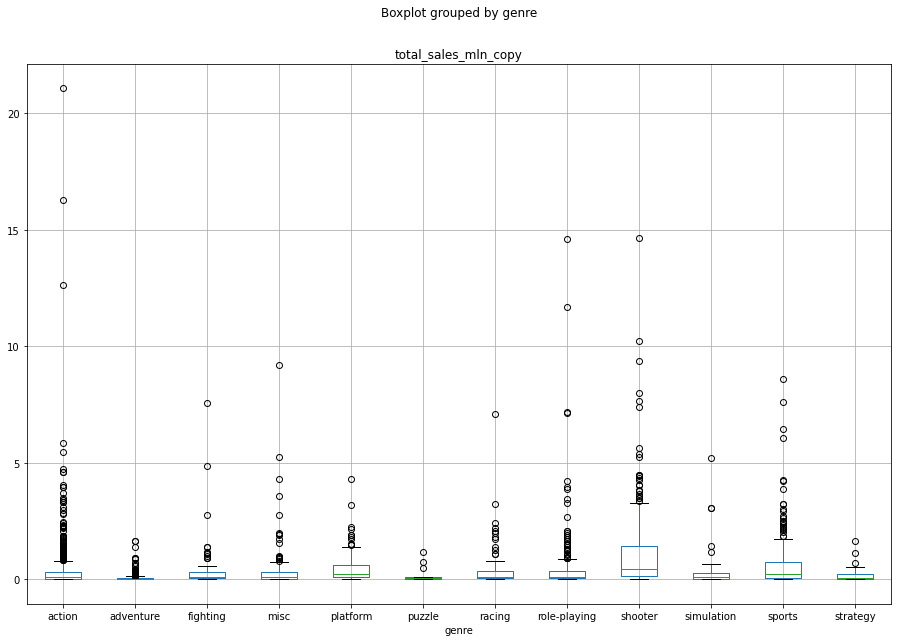

In [55]:
# боксплот по жанрам
boxplot_genre = period_data.boxplot('total_sales_mln_copy', by='genre', figsize=(15,10))

##### Выводы

Самый высокий средний показатель продаж у шутеров, далее следуют спорт, платформы и ролевые игры. Но в продажах во всех жанрах мы видим большое std, в данных много выбросов и они тянут за собой среднее.

Распределения по всем данным скошены вправо, много выбросов, то есть редких, но больших значений (вероятно это продажи в пиковый период распространения, какой-либо популярной игры/игр, после чего цифры стабилизируются). Надежнее всего выглядит плотность значений продаж у шутеров, платформ и спорта. Экшен-игры показывают большее количество выбросов - экстремально высоких, но не частых продаж.

## Портрет игрока по региону продаж

- Составим портрет пользователя в Европе, Америке и Японии.
- Определим для пользователя каждого региона (NA, EU, JP) в контексте продаж: самые популярные платформы (топ-5), самые популярные жанры (топ-5). 
- Посмотрим влияет ли рейтинг ESRB(возрастная метка) на продажи в отдельном регионе?

### Платформы: топ-5


Топ-5 платформ по совокупным продажам в Америке(na_sales_mln_copy), Европе(eu_sales_mln_copy) и Японии(jp_sales_mln_copy)


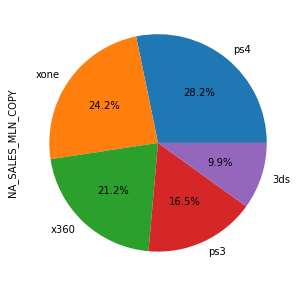

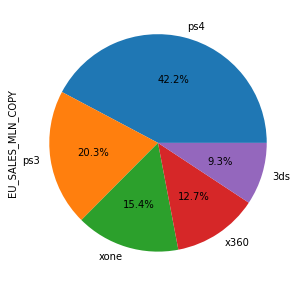

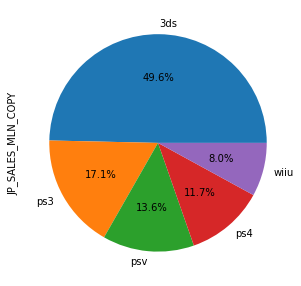

In [56]:
print('')
print(
    'Топ-5 платформ по совокупным продажам в Америке(na_sales_mln_copy), Европе(eu_sales_mln_copy) и Японии(jp_sales_mln_copy)'
)
for country in period_data.loc[:,['na_sales_mln_copy', 'eu_sales_mln_copy', 'jp_sales_mln_copy']]:
    period_data.groupby('platform')[country].sum().sort_values(ascending=False)[:5].plot(
        kind='pie', autopct='%1.1f%%', figsize=(10,5), ylabel=country.upper())
    plt.show()

- Во всех рассматриваемых регионах в топ-5 есть: ps4, ps3 и 3ds.
- ps4 лидирует в Америке (28% продаж) и в Европе (42% продаж), а в Японии занимает только 4 место с долей продаж 11%
- ps3 на втором месте по продажам в Европе и Японии
- 3ds явный лидер по продажам в Японии (49%), и замыкает пятерку в Америке (9,9%) и Европе (9,3%)
- xone, x360 хорошо продаются в Европе  и Америке  и не входит в топ-5 по продажам в Японии
- psv и wiiu хорошо продаются в Японии и отсутствует в топ-5 в Европе и Америке

### Жанры: топ-5


Топ-5 жанров по совокупным продажам в Америке(na_sales_mln_copy), Европе(eu_sales_mln_copy) и Японии(jp_sales_mln_copy)


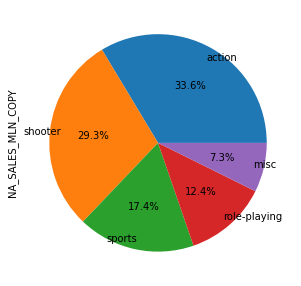

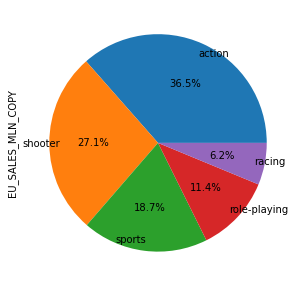

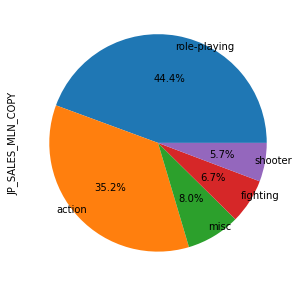

In [57]:
print('')
print(
    'Топ-5 жанров по совокупным продажам в Америке(na_sales_mln_copy), Европе(eu_sales_mln_copy) и Японии(jp_sales_mln_copy)'
)
for country in period_data.loc[:,['na_sales_mln_copy', 'eu_sales_mln_copy', 'jp_sales_mln_copy']]:
    period_data.groupby('genre')[country].sum().sort_values(ascending=False)[:5].plot(
        kind='pie', autopct='%1.1f%%', figsize=(10,5), ylabel=country.upper(), labeldistance=0.9)
    plt.show()

- Во всех странах в топ-5 жанров есть: ролевые игры, экшены и шутеры.
- В Европе и Америке совпадают жанры занимающие с 1 по 4 места, распределения по долям этих жанров также очень похожее: 1 место- экшен игры, 2 место - шутеры, 3 место - спорт и 4 место - ролевые игры.
- В Европе на 5 месте - рэйсинг.
- В Америке на 5 месте - misc
- В Японии два жанра охватывают почти 80% продаж: на первом месте - ролевые игры (44 % продаж), на втором - экшен (35% продаж)
- В Японии шутеры занимают последнее место в топ-5, с долей 5% (в Европе - 2 место и 27%, в Америке - также 2 место с долей 29%)
- Файтинг - уникальный для Япони жанр в топ-5 (доля 6%)
- Рэйсинг - уникальный для Европы жанр в топ-5 (доля 6%)

### Зависимость от возрастного маркета игр (ESRB)

В исходных данных было много пропусков в графе - рейтинг, мы заполнили их значением unknown. Посмотрим долю этих пропусков в данных за актуальный период.

In [58]:
len(period_data.query('rating == "unknown"')) / len(period_data)

0.43752798925212716

Для 43% данных о продажах рейтинг игры неизвестен. Далее посмотрим как распределились продажи по известным рейтингам для оставшихся 60% случаев продаж (значение 'unknown' не будем отфильтровывать для наглядности)

<AxesSubplot:title={'center':'Продажи в зависимости от рейтинга ESRB'}, xlabel='рейтинг'>

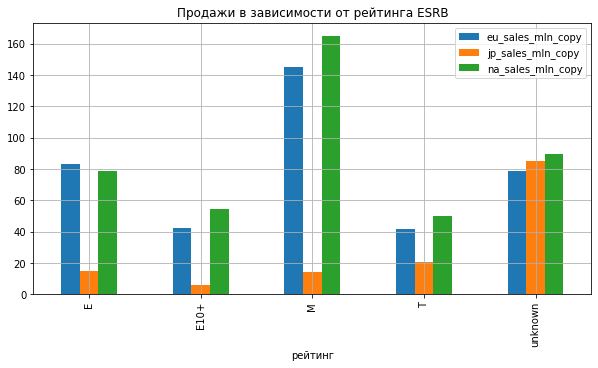

In [59]:
age_marker = period_data.pivot_table(
    index='rating', values=('na_sales_mln_copy', 'eu_sales_mln_copy', 'jp_sales_mln_copy'), aggfunc=('sum')
)
age_marker.plot(kind='bar', figsize=(10,5), grid=True, title='Продажи в зависимости от рейтинга ESRB', xlabel='рейтинг')

Картина продаж по рейтингам в Европе и Америке очень похожа.
- Лидируют с большим отрывом игры с возрастным рейтингом М (17+) - в Европе  более 140 млн. проданных копий, в Америке более 160 млн.)
- На втором месте игры с меткой Е(для всех возрастов) - более 80 млн. копий продано в Европе, около 80 млн. копий - в Америке
- На третьем месте с примерно одинаковыми цифрами, игры с возрастными метками Е10+ (для всех от 10 лет) и Т (подростки 13+): в Европе продано более 40 млн. копий игр каждой из указанных категорий, в Америке - 50 млн. копий.

В Японии ситуация совсем иная:
- нет таких больших скачков в распределении продаж по рейтингам
- с небольшим перевесом больше покупают игры с возрастной меткой Т (13+), примерно одинаковые показатели у игр E (для всех) и М (17+), хуже всего продаются игры с рейтингом Е10+

Проведем уточнение данных, выделив для каждой возрастной группы игр самые продаваемые жанры по регионам.

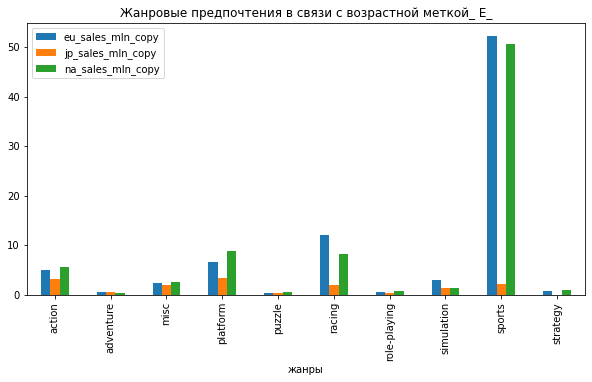

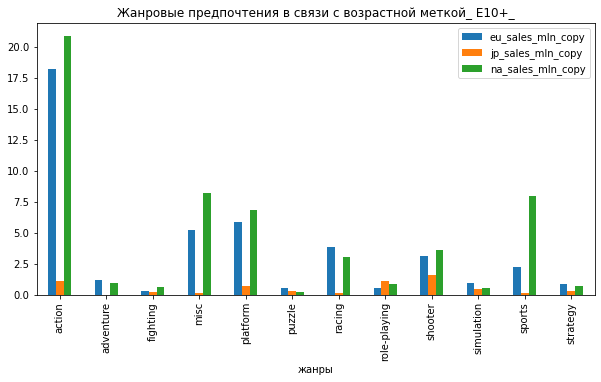

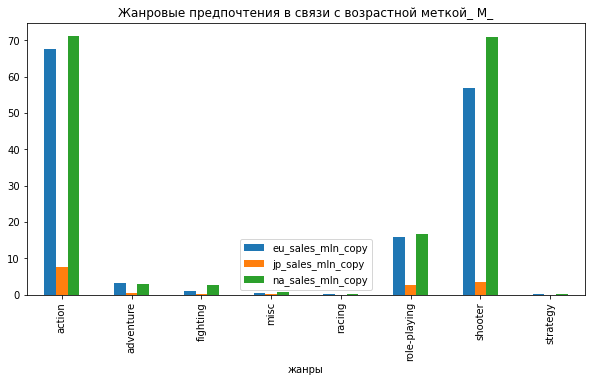

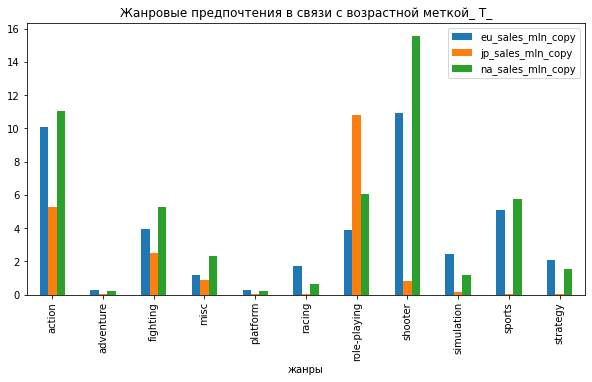

In [60]:
for i in age_marker.index[:4]:
    period_data.query('rating == @i').pivot_table(
    index='genre', values=('na_sales_mln_copy', 'jp_sales_mln_copy', 'eu_sales_mln_copy'), aggfunc='sum'
    ).plot(kind='bar', figsize=(10,5), xlabel='жанры', title=f'Жанровые предпочтения в связи с возрастной меткой_ {i}_')

- рейтинг Е (игры для всех возрастов) - по продажам в Европе и Америке с большим отрывом лидируют спорт-игры, в Японии - экшены и платформы
- рейтинг Е10+ (игры для всех от 10 лет) - по продажам в Европе и Америке с большим отрывом лидируют экшены, в Японии - шутеры
- рейтинг М (17+) - во всех регионах в лидерах экшены, шутеры и ролевые игры
- рейтин Т (подростки от 13+) - самая разнообразная картина продаж по жанрам: в Европе и Америке лидируют шутеры и экшены, на третьем месте ролевые игры и спорт; в Японии - лидируют ролевые игры, экшены и файтинг

По рейтингу игр ESRB и их продажам в Европе и Америке выделить узкую возрастную группу игроков, дающих большие продажи, сложно, так как больше всего продаются игры для всех и игры с пометкой от 17+. А вот в Японии можно все же сузить возрастную группу - большие продажи приносят игры для подростков 13+.

### Выводы

Портрет пользователя в Америке и Европе в большей части совпадает и в популярных платформах, и в полулярных жанрах, и в продажах игр с указанием возрастного рейтинга.
Япония отличается во всех исследуемых параметрах, при подготовке рекламных компаний это стоит учитывать.

## Статистика. Проверка гипотез.

Далее проверим гипотезы о равенстве средних двух генеральных совокупностей, проведя т-тесты.

Уровень значимости alpha примем за 0.05, общепринятое значение, которое позволит уменьшить риск (в отличие от 0,01) ошибки (например, риск не отвергнуть ложную нулевую гипотезу)

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Н0 (нулевая гипотеза)** Средние пользовательские рейтинги платформ Xbox One и PC равны

**Н1 (альтернативная гипотеза)** Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [61]:
# тест
alpha = 0.05
result = st.ttest_ind(
    period_data.query('platform == "xone" and user_score < 1111')['user_score'],
    period_data.query('platform == "pc" and user_score < 1111')['user_score'], equal_var=False)
print('р-значение', result.pvalue)

р-значение 0.14759594013430463


In [62]:
# интерпретация результата
if result.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

Опровергнуть нулевую гипотезу нельзя


По результатам т-теста отвергнуть нулевую гипотезу о равенстве средних не получилось. Полученное р-значение говорит о том, что с вероятностью в 14% мы можем получить такое или большее различие случайно, значимых различий между пользовательскими рейтингами платформ  Xbox One и PC выявить не получилось.

### Средние пользовательские рейтинги жанров Action и Sports разные

**Н0 (нулевая гипотеза)** Средние пользовательские рейтинги жанров Action и Sports равны

**Н1 (альтернативная гипотеза)** Средние пользовательские рейтинги жанров Action и Sports не равны

In [63]:
# тест
alpha = 0.05
result = st.ttest_ind(
    period_data.query('genre == "action" and user_score < 1111')['user_score'],
    period_data.query('genre == "sports" and user_score < 1111')['user_score'])
print('р-значение', result.pvalue)

р-значение 1.0517832389140023e-27


In [64]:
# интерпретация
if result.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

Принимаем альтернативную гипотезу


По результатам т-теста нулевая гипотеза о равенстве средних не подтвердилась, была принята альтернативная гипотеза, о том что средние пользовательские рейтинги жанров Экшен и Спорт не равны. Разница не случайна, есть значимые отличия между двумя выборками.

## Вывод

В рамках проекта были представлены данные о продажах игр с 1980 по 2016 год, весь объем информации для выполнения цели проекта нам не понадобился, поэтому основной анализ строился на данных актуального периода (2013-2016 гг.)

Предварительно все данные были обработаны на предмет пропусков и дубликатов, в процессе предобработки мы удалили пропуски в столбцах name и year_of_release (доля удаленных пропусков 0,16). 

Цель проекта - выявить закономерности, определяющие успешность на рынке той или иной игры, для дальнейшего выделения потенциально популярного продукта и планирования рекламных кампаний, для этого мы:
- рассмотрели глобальные продажи в разбивке по платформам и жанрам
- оценили зависимость продаж игр от отзывов пользователей и критиков
- составили портрет пользователя Европы, Америки и Японии
- проверили гипотезы


Выводы по всему массиву данных:
- перспективные платформы исходя из возраста и дохода - ps4, xone, 3ds,wiiu - это молодые платформы на этапе стабилизации уровня дохода или небольшого снижения. Они принесли больший доход в последний учтенный полный год.
- Стоит обратить внимание и на ps3, x360 и pc, за счет постоянных пользователей они имеют пусть небольшие, но достаточно стабильные продажи и суммарно опережают 3ds (3 место рейтинга по доходам в 2015 году)

Выводы по актуальному периоду для планирования рекламных компаний:
- Стабильные данные по продажам мы оценили по медиане - выше медианы продаж у ps4, wii, x360, xone, wiiu (данные о продажах и по жанрам и по платформам содержат очень большое количество выбросов, распределение сильно сдвинуто вправо и тянет за собой среднее, поэтому обратились к медиане)
- По жанрам Самый высокий средний показатель продаж у шутеров, далее следуют спорт, платформы и ролевые игры. Надежнее всего выглядит плотность значений продаж у шутеров, платформ и спорта. Экшен-игры показывают большее количество выбросов - экстремально высоких, но не частотных продаж.
- В целом можно сказать, что немногие пользователи опираются на чьи-либо отзывы при покупке игры. Но влияние критиков все же более заметно. Так же заметна взаимосвязь между хорошими отзывами критиков и пользователей.
- Портрет пользователя в Америке и Европе в большей части совпадает и в популярных платформах, и в полулярных жанрах, и в продажах игр с указанием возрастного рейтинга. Япония отличается во всех исследуемых параметрах, при подготовке рекламных компаний это стоит учитывать (подробные раскладки и выводы смотри в пятой части проекта)
- После проведения т-теста  значимых различий между пользовательскими рейтингами платформ  Xbox One и PC выявить не получилось, выяснили также, что средние пользовательские рейтинги жанров Экшен и Спорт не равны (разница не случайна, есть значимые отличия между двумя выборками)
